In [2]:
#Import Packages

import pandas as pd
import numpy as np
import geopandas as gpd
import shapely.geometry
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [6]:
#Read in GeoJSONs with Geopandas

plates_gdf = gpd.read_file("MR_Data/PB2002_plates.json")
countries_gdf = gpd.read_file("MR_Data/countries.geojson")
earthquakes_gdf = gpd.read_file("MR_Data/earthquakes.GeoJSON")
volcanoes_gdf = gpd.read_file("MR_Data/volcanoes.GeoJSON")
vents_gdf = gpd.read_file("MR_Data/vents.GeoJSON")

fig, ax = plt.subplots(figsize = (20, 20))
ax.set_aspect('equal')
plates_gdf.plot(ax=ax, color='blue', edgecolor='white', alpha = 0.3, lw = 2.0)
countries_gdf.plot(ax=ax, edgecolor='black', alpha = 0.3)
earthquakes_gdf.plot(ax=ax, markersize = 25, column = "Magnitude", cmap = "rainbow", marker = "x")
volcanoes_gdf.plot(ax=ax, markersize = 25, column = "Type", cmap = "rainbow", marker = "^")
vents_gdf.plot(ax=ax, markersize = 25, column = "Depth", cmap = "rainbow", marker = "|")

earthquakes_gdf

volcanoes_gdf.head(1)

vents_gdf.head(1)

eruptions = pd.read_table("MR_Data/volerup.txt")

#eruptions
eruptions.info()

eruptions = eruptions.drop(["TOTAL_HOUSES_DESTROYED_DESCRIPTION", "TOTAL_HOUSES_DESTROYED", "TOTAL_DAMAGE_DESCRIPTION", 
                            "TOTAL_DAMAGE_MILLIONS_DOLLARS", "TOTAL_INJURIES_DESCRIPTION", "TOTAL_INJURIES", 
                            "TOTAL_MISSING_DESCRIPTION", "TOTAL_MISSING", "TOTAL_DEATHS_DESCRIPTION", 
                            "HOUSES_DESTROYED_DESCRIPTION", "HOUSES_DESTROYED", "DAMAGE_DESCRIPTION", 
                            "DAMAGE_MILLIONS_DOLLARS", "INJURIES_DESCRIPTION", "INJURIES", "MISSING_DESCRIPTION", 
                            "MISSING", "DEATHS_DESCRIPTION", "DEATHS", "Agent"], axis = 1)
#geometry_erupt = [Point(xy) for xy in zip(eruptions.Longitude, eruptions.Latitude)]
#crs = {"init": "epsg:4326"} 
#eruptions_gdf = gpd.GeoDataFrame(eruptions, crs=crs, geometry=geometry_erupt)

eruptions_gdf

def web_scraper(url, class_):
    request = urllib.request.Request(url)
    result = urllib.request.urlopen(request)
    resulttext = result.read()
    soup = BS(resulttext, 'html.parser')
    table = soup.find_all('table', class_=class_)
    table_2 = table[0]
    table_headers = table_2.find_all("th")
    columns = [th.text for th in table_headers]
    rows = []
    for tr in table_2.find_all("tr")[1:]:
        row_data = [td.text for td in tr.find_all("td")]
        rows.append(row_data)
    return pd.DataFrame(rows, columns = columns)

earthquakes_2 = WebScraper(
    "https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900", 
    "sortable wikitable", earthquakes_2)
print(earthquakes_2)

request = urllib.request.Request("https://en.wikipedia.org/wiki/List_of_large_volcanic_eruptions_of_the_20th_century")
result = urllib.request.urlopen(request)
resulttext = result.read()
soup = BS(resulttext, 'html.parser')
table = soup.find_all('table', class_="wikitable sortable")
table_2 = table[0]
#table_2
table_headers = table_2.find_all("th")[1:5]
#table_headers
columns = [th.text for th in table_headers]
rows = []
for tr in table_2.find_all("tr")[1:]:
    row_data = [td.text for td in tr.find_all("td")]
    rows.append(row_data)
eruptions_2 = pd.DataFrame(rows, columns = columns)

test = "(\[\d+\])"
eruptions_2["Volcano (eruption)"] = eruptions_2["Volcano (eruption)"].str.replace(test, "")
eruptions_2.columns = ["Name", "Year", "Casualties", "Notes"]
eruptions_2.head()

#volcanoes_gdf.info()
#cols = ["Country", "Type", "lat", "lng", "Elevation", "geometry"]
volcanoes_2 = volcanoes_gdf.drop(["Country", "Type", "Elevation", "geometry"], axis = 1)
volcanoes_2.columns = ["Name", "lat", "lng"]

volcanoes["lat"] = volcanoes["lat"].astype(str)
volcanoes["lng"] = volcanoes["lng"].astype(str)

volcanoes.info()

eruptions_2.info()

eruptions_2["Name"] = eruptions_2["Name"].str.strip()

eruptions_2[eruptions_2["Name"].str.contains("Alaid")]

volcanoes_2[volcanoes_2["Name"].str.contains("Alaid")]

#eruptions_new["lat"] = volcanoes_2["Name"].map(volcanoes_2.set_index("Name")["lat"])
eruptions_new = eruptions_2.merge(volcanoes_2, how = "left", on = "Name")
eruptions_new_notnull = eruptions_new[eruptions_new["lat"].notnull()]
#len(eruptions_new_notnull)
#eruptions_new
eruptions_new_notnull

geometry_erupt_new = [Point(xy) for xy in zip(eruptions_new.lng, eruptions_new.lat)]
crs = {"init": "epsg:4326"}
eruptions_new_gdf = gpd.GeoDataFrame(eruptions_new, crs=crs, geometry=geometry_erupt_new)
eruptions_new_gdf

request = urllib.request.Request("https://en.wikipedia.org/wiki/List_of_submarine_volcanoes")
result = urllib.request.urlopen(request)
resulttext = result.read()
soup = BS(resulttext, 'html.parser')
table = soup.find_all('table', class_="wikitable sortable")
table_2 = table[0]
#table_2
table_headers = table_2.find_all("th")
#table_headers
columns = [th.text for th in table_headers]
rows = []
for tr in table_2.find_all("tr")[1:]:
    row_data = [td.text for td in tr.find_all("td")]
    rows.append(row_data)
submarine = pd.DataFrame(rows, columns = columns)

submarine

spade = "(\d*♠)"
submarine["Summit Elevation"]=submarine["Summit Elevation"].str.replace(spade, "")
submarine["Approximate elevation above seafloor"]=submarine["Approximate elevation above seafloor"].str.replace(spade, "")

submarine

coord_ms = "(.*/.*/)"
submarine["Location"]=submarine["Location"].str.replace(coord_ms, "")

submarine

submarine[['lat','lng']] = submarine['Location'].str.split(';',expand=True)

submarine["lat"] = submarine["lat"].str.strip()
submarine["lng"] = submarine["lng"].str.strip()
submarine["lat"] = pd.to_numeric(submarine["lat"])
submarine["lng"] = pd.to_numeric(submarine["lng"])

submarine

geometry_sub = [Point(xy) for xy in zip(submarine.lng, submarine.lat)]
crs = {"init": "epsg:4326"}
submarine_gdf = gpd.GeoDataFrame(submarine, crs=crs, geometry=geometry_sub)
submarine_gdf.head(1)

submarine_gdf.plot()

#encoding for "utf-8"
#tsunamis = pd.read_table("MR_Data/tsevent.txt", encoding = "ISO-8859-1")

tsunamis_2 = pd.read_csv("MR_Data/tsunamis.csv")
tsunamis_2 = tsunamis_2.drop("Unnamed: 0", axis = 1)
tsunamis_2.columns = ["Year", "Month", "Day", "Focal_Depth", "Magnitude", "Country", "Location", "lat", "lng", "Max_Water_Height", "Deaths", "Total_Deaths"]
tsunamis_2 = tsunamis_2.drop(0)
#tsunamis_2
#tsunamis_2["lat"] = pd.to_numeric(tsunamis_2["lat"])
#tsunamis_2["lng"] = pd.to_numeric(tsunamis_2["lng"])
#geometry_t = [Point(xy) for xy in zip(tsunamis_2.lng, tsunamis_2.lat)]
#crs = {"init": "epsg:4326"}
#tsunamis_gdf = gpd.GeoDataFrame(tsunamis_2, crs=crs, geometry=geometry_t)
#tsunamis_gdf.head()

DD = d + (min/60) + (sec/3600)

fig, ax = plt.subplots(figsize = (20, 20))
ax.set_aspect('equal')
plates_gdf.plot(ax=ax, color='blue', edgecolor='white', alpha = 0.3, lw = 2.0)
countries_gdf.plot(ax=ax, edgecolor='black', alpha = 0.3)
#earthquakes_gdf.plot(ax=ax, markersize = 25, column = "Magnitude", cmap = "rainbow", marker = "x")
#volcanoes_gdf.plot(ax=ax, markersize = 5, color = "red") #, column = "Type", cmap = "rainbow", marker = "^")
#vents_gdf.plot(ax=ax, markersize = 25, column = "Depth", cmap = "rainbow", marker = "|")
#eruptions_gdf.plot(ax=ax, markersize = 5, color = "orange") #, column = "Elevation", cmap = "rainbow", marker = "^")
#submarine_gdf.plot(ax=ax, markersize = 15, color = "green")
#eruptions_new_gdf.plot(ax=ax, markersize = 5, color = "b")
tsunamis_gdf.plot(ax=ax, markersize = 5, color = "purple")

earthquakes_gdf.head(1)

volcanoes_gdf.head(1)

submarine_gdf.head(1)

eruptions_gdf.head(1)

eruptions_new_gdf.head(1)

tsunamis_gdf.head(1)

vents_gdf.head(1)

columns to drop:
Tsunamis = ["Country", "Location", :"Max_Water_Height"]
Vents = ["Name", "Activity", "Region", "Year&Discovered"]
Eruptions_new = ["Notes"]
Eruptions = ["Location", "Country", "Elevation", "Status", "Time"]

dfs to concat:
submarine and volcanoes

Things to fix:

Merge between eruptions_2 and volcanoes.

In [3]:
earthquakes2_gdf = gpd.read_file("MR_Data/earthquakes2.GeoJSON")
#eruptions_more_gdf = gpd.read_file("MR_Data/geoserver-GetFeature.application")

earthquakes2_gdf.head(1)

lat = []
lng = []
for point in earthquakes2_gdf["geometry"]:
    lng.append(point.x)
    lat.append(point.y)
#lat

earthquakes2 = earthquakes2_gdf.drop(["geometry", "place", "id"], axis = 1)
earthquakes2["lat"] = lat
earthquakes2["lng"] = lng
earthquakes2.head(15)

earthquakes2["date"] = earthquakes2["date"].apply(str)
year = "(\d\d\d\d)"
month = "(\d\d)"
earthquakes2["year"] = earthquakes2["date"].str.extract(year, expand = True)
earthquakes2["date"] = earthquakes2["date"].str[4:]
earthquakes2["month"] = earthquakes2["date"].str.extract(month, expand = True)
earthquakes2["date"] = earthquakes2["date"].str[2:]
earthquakes2.columns = ["Day", "Depth", "Mag", "lat", "lng", "Year", "Month"]
earthquakes2 = earthquakes2[["Year", "Month", "Day", "lat", "lng", "Mag", "Depth"]]
earthquakes2.head()
#for date in earthquakes2["date"]:
    #year_md = [date[i:i+4] for i in range(0, len(date), 4)]

#year_md

eruptions_more_gdf2 = eruptions_more_gdf.drop(["id", "VolcanoName", "VolcanoNumber", "StartDate", "EndDate", "Activity_ID", "geometry"], axis = 1)
eruptions = pd.DataFrame(eruptions_more_gdf2)
eruptions.head(1)

eruptions.columns = ["ExplosivityIndexMax", "Year", "Month", "Day", "End_Year", "End_Month", "End_Day", "Continuing", "lat", "lng"]
eruptions = eruptions[["Year", "Month", "Day", "lat", "lng", "ExplosivityIndexMax", "End_Year", "End_Month", "End_Day", "Continuing"]]
eruptions.head()

tsunamis_2 = tsunamis_2.drop(["Country", "Location"], axis = 1)
tsunamis_2 = tsunamis_2[["Year", "Month", "Day", "lat", "lng", "Magnitude", "Focal_Depth", "Max_Water_Height", "Deaths", "Total_Deaths"]]
#tsunamis_2.head()
tsunamis_2.shape

tsunamis_2[tsunamis_2["lat"].isnull()]

tsunamis_3 = tsunamis_2.drop(tsunamis_2[tsunamis_2["lat"].isnull()].index)

tsunamis_3.head(100)

#tsunamis_3[tsunamis_3["Year"]=="1900"]
tsunamis_4 = tsunamis_3[tsunamis_3.index>=1345]
tsunamis_4
#tsunamis_3[tsunamis_3.index>=1344]

earthquakes2.to_json("JSONs_for_TP/earthquakes2.json")
eruptions.to_json("JSONs_for_TP/eruptions.json")
tsunamis_4.to_json("JSONs_for_TP/tsunamis.json")

In [4]:
boundaries_gdf = gpd.read_file("MR_Data/PB2002_steps.json")

boundaries_gdf

#earthquakes2_gdf
#volcanoes2_gdf
fig, ax = plt.subplots(figsize = (20, 20))
ax.set_aspect('equal')
plates_gdf.plot(ax=ax, color='blue', edgecolor='white', alpha = 0.3, lw = 2.0)
countries_gdf.plot(ax=ax, edgecolor='black', alpha = 0.3)
earthquakes2_gdf.plot(ax=ax, markersize = 5, color = "blue")
#eruptions_new_gdf.plot(ax=ax, markersize = 5, color = "orange")
#eruptions_gdf.plot(ax=ax, markersize = 5, color = "green")
#tsunamis_gdf.plot(ax=ax, markersize = 5, color = "yellow")
boundaries_gdf.plot(ax=ax, column = "STEPCLASS", cmap = "rainbow", lw = 3, legend = True)
#vents_gdf.plot(ax=ax, markersize = 5, color = "blue")
#eruptions_more_gdf.plot(ax=ax, markersize = 5, color = "yellow")
#earthquakes_gdf.plot(ax=ax, markersize = 5, color = "yellow")

In [5]:
boundaries_sub = boundaries_gdf[boundaries_gdf["STEPCLASS"] == "SUB"]
boundaries_ccb = boundaries_gdf[boundaries_gdf["STEPCLASS"] == "CCB"]
boundaries_crb = boundaries_gdf[boundaries_gdf["STEPCLASS"] == "CRB"]
boundaries_ctf = boundaries_gdf[boundaries_gdf["STEPCLASS"] == "CTF"]
boundaries_ocb = boundaries_gdf[boundaries_gdf["STEPCLASS"] == "OCB"]
boundaries_osr = boundaries_gdf[boundaries_gdf["STEPCLASS"] == "OSR"]
boundaries_otf = boundaries_gdf[boundaries_gdf["STEPCLASS"] == "OTF"]
#boundaries_sub

#from shapely.geometry import shape#, MultiLineString
#multi_line_sub = MultiLineString(boundaries_sub[boundaries_sub["geometry"]])

#points = earthquakes2_gdf.unary_union.intersection(boundaries_sub.unary_union)
#points

#intersections= gpd.sjoin(earthquakes2_gdf, boundaries_sub, how="inner", op='intersects')
#intersections

#the_lines = [shape(line['geometry']) for line in boundaries_sub]
#the_points = [shape(point['geometry']) for point in earthquakes2_gdf]
#the_lines

union_test = boundaries_sub.unary_union
union_test

union_test_eqs = earthquakes2_gdf.unary_union
union_test_eqs

overlap_test = union_test_eqs.intersects(union_test)
overlap_test

intersections = []
for line in boundaries_sub["geometry"]:
    intersections.append(line.intersection(earthquakes2_gdf["geometry"]))
                         
intersections

In [6]:
earthquakes_gdf = earthquakes_gdf.drop(earthquakes_gdf[earthquakes_gdf["geometry"].isnull()].index)
#earthquakes_gdf[earthquakes_gdf["geometry"].isnull()]
#earthquakes_gdf
#len(earthquakes_gdf)
new_index = range(0, 570)
earthquakes_gdf.index = new_index
earthquakes_gdf

,Country,Date,Deaths,Lat,Long,Magnitude,geometry
0,"Mindanao, Philippines","January 1, 2001",0.0,6.898,126.579,7.5,POINT (126.579 6.898)
1,Vanuatu,"January 9, 2001",0.0,-14.928,167.170,7.1,POINT (167.17 -14.928)
2,"Kodiak Island region, Alaska, United States","January 10, 2001",0.0,57.078,-153.211,7.0,POINT (-153.211 57.078)
3,Offshore El Salvador\nsee January 2001 El Salv...,"January 13, 2001",944.0,13.049,-88.660,7.7,POINT (-88.66 13.049)
4,"Gujarat, India\nsee 2001 Gujarat earthquake","January 26, 2001",NaN,23.419,70.232,7.7,POINT (70.232 23.419)
5,El Salvador\nsee February 2001 El Salvador ear...,"February 13, 2001",315.0,13.671,-88.938,6.6,POINT (-88.938 13.671)
6,"Southern Sumatra, Indonesia","February 13, 2001",0.0,-4.680,102.562,7.4,POINT (102.562 -4.68)
7,El Salvador\nsee February 2001 El Salvador ear...,"February 17, 2001",1.0,13.790,-89.110,4.1,POINT (-89.11 13.79)
8,"Western Sichuan, China","February 23, 2001",3.0,29.513,101.129,5.6,POINT (101.129 29.513)
9,Molucca Sea,"February 24, 2001",0.0,1.271,126.249,7.1,POINT (126.249 1.271)


In [7]:
earthquakes_geo = earthquakes_gdf["geometry"]
#print(type(earthquakes_geo))
sub_geo = boundaries_sub["geometry"]
#print(type(sub_geo))
boundaries_geo = boundaries_gdf["geometry"]
#print(type(boundaries_geo))
ccb_geo = boundaries_ccb["geometry"]
crb_geo = boundaries_crb["geometry"]
ctf_geo = boundaries_ctf["geometry"]
ocb_geo = boundaries_ocb["geometry"]
osr_geo = boundaries_osr["geometry"]
otf_geo = boundaries_otf["geometry"]
len(earthquakes_geo)
#sub_geo.head()
#earthquakes_geo.head()

570

plt.hist(earthquakes_gdf["min_dist_to_lines"], bins = 500)

earthquakes_sub = earthquakes_gdf[earthquakes_gdf["min_dist_to_lines"]<=1.08598896e+00]

def min_distance(point, lines):
    return lines.distance(point).min()

earthquakes_gdf['min_dist_to_lines_2'] = earthquakes_gdf.geometry.apply(min_distance, boundaries_sub)

#earthquakes_linked = len(earthquakes_gdf)

def closest_boundary(geoseries):
    min_distances = []
    
    for i, point in enumerate(earthquakes_geo):
        min_dist = np.min([point.distance(line) for line in geoseries])
        min_distances.append(min_dist)
    return min_distances

dict_list = [boundaries_geo, sub_geo, ccb_geo, crb_geo, ctf_geo, ocb_geo, osr_geo, otf_geo]

total_min_distances = []

for geoseries in dict_list:
    min_distances = closest_boundary(geoseries)
    total_min_distances.append(min_distances)
    
total_min_distances

len(total_min_distances)

#cols = ["boundaries_geo", "sub_geo", "ccb_geo", "crb_geo", "ctf_geo", "ocb_geo", "osr_geo", "otf_geo"]
boundary_distances = pd.DataFrame(total_min_distances)
#len(boundary_distances)
boundary_distances = boundary_distances.transpose()
print(len(boundary_distances))
boundary_distances.columns = ["boundaries_geo", "sub_geo", "ccb_geo", "crb_geo", "ctf_geo", "ocb_geo", "osr_geo", "otf_geo"]
earthquakes_dist = pd.concat([earthquakes_gdf, boundary_distances], axis=1)
print(len(earthquakes_dist))
#boundary_distances
print(len(earthquakes_gdf))
earthquakes_dist.to_csv("MR_Data/Earthquake_boundary_distances")

In [8]:
boundary_distances = pd.read_csv("MR_Data/Earthquake_boundary_distances")
boundary_distances = boundary_distances.drop("Unnamed: 0", axis = 1)
boundary_distances.head()

,Country,Date,Deaths,Lat,Long,Magnitude,geometry,boundaries_geo,sub_geo,ccb_geo,crb_geo,ctf_geo,ocb_geo,osr_geo,otf_geo
0,"Mindanao, Philippines","January 1, 2001",0.0,6.898,126.579,7.5,POINT (126.579 6.898),0.662349,0.662349,4.660357,4.846614,5.179907,4.561420,6.785813,5.817892
1,Vanuatu,"January 9, 2001",0.0,-14.928,167.170,7.1,POINT (167.17 -14.928),0.908836,0.908836,1.269794,1.724729,12.466521,7.513063,1.933371,4.214104
2,"Kodiak Island region, Alaska, United States","January 10, 2001",0.0,57.078,-153.211,7.0,POINT (-153.211 57.078),1.342746,1.342746,7.771425,44.489400,16.161325,56.823301,22.907951,23.865337
3,Offshore El Salvador\nsee January 2001 El Salv...,"January 13, 2001",944.0,13.049,-88.660,7.7,POINT (-88.66 13.049),1.068072,1.068072,3.459298,1.916418,3.336281,7.879090,8.490126,3.822822
4,"Gujarat, India\nsee 2001 Gujarat earthquake","January 26, 2001",NaN,23.419,70.232,7.7,POINT (70.232 23.419),3.756432,23.895157,3.756432,5.762146,3.756432,5.292352,13.775858,5.292352


In [9]:
conditions = [
    (boundary_distances['boundaries_geo'] == boundary_distances['sub_geo']), 
    (boundary_distances['boundaries_geo'] == boundary_distances['ccb_geo']),
    (boundary_distances['boundaries_geo'] == boundary_distances['crb_geo']), 
    (boundary_distances['boundaries_geo'] == boundary_distances['ctf_geo']),
    (boundary_distances['boundaries_geo'] == boundary_distances['ocb_geo']), 
    (boundary_distances['boundaries_geo'] == boundary_distances['osr_geo']), 
    (boundary_distances['boundaries_geo'] == boundary_distances['otf_geo'])]
choices = ['SUB', 'CCB', 'CRB', 'CTF', 'OCB', 'OSR', 'OTF']
boundary_distances['closest_boundary'] = np.select(conditions, choices, default=np.nan)

In [10]:
boundary_distances

,Country,Date,Deaths,Lat,Long,Magnitude,geometry,boundaries_geo,sub_geo,ccb_geo,crb_geo,ctf_geo,ocb_geo,osr_geo,otf_geo,closest_boundary
0,"Mindanao, Philippines","January 1, 2001",0.0,6.898,126.579,7.5,POINT (126.579 6.898),0.662349,0.662349,4.660357,4.846614,5.179907,4.561420,6.785813,5.817892,SUB
1,Vanuatu,"January 9, 2001",0.0,-14.928,167.170,7.1,POINT (167.17 -14.928),0.908836,0.908836,1.269794,1.724729,12.466521,7.513063,1.933371,4.214104,SUB
2,"Kodiak Island region, Alaska, United States","January 10, 2001",0.0,57.078,-153.211,7.0,POINT (-153.211 57.078),1.342746,1.342746,7.771425,44.489400,16.161325,56.823301,22.907951,23.865337,SUB
3,Offshore El Salvador\nsee January 2001 El Salv...,"January 13, 2001",944.0,13.049,-88.660,7.7,POINT (-88.66 13.049),1.068072,1.068072,3.459298,1.916418,3.336281,7.879090,8.490126,3.822822,SUB
4,"Gujarat, India\nsee 2001 Gujarat earthquake","January 26, 2001",NaN,23.419,70.232,7.7,POINT (70.232 23.419),3.756432,23.895157,3.756432,5.762146,3.756432,5.292352,13.775858,5.292352,CCB
5,El Salvador\nsee February 2001 El Salvador ear...,"February 13, 2001",315.0,13.671,-88.938,6.6,POINT (-88.938 13.671),1.311661,1.532506,4.129188,1.311661,2.851776,8.421650,8.399115,3.428820,CRB
6,"Southern Sumatra, Indonesia","February 13, 2001",0.0,-4.680,102.562,7.4,POINT (102.562 -4.68),1.766433,1.766433,17.017985,8.681763,11.084990,10.174701,14.060068,14.094531,SUB
7,El Salvador\nsee February 2001 El Salvador ear...,"February 17, 2001",1.0,13.790,-89.110,4.1,POINT (-89.11 13.79),1.102676,1.578751,4.324288,1.102676,2.824941,8.630159,8.492430,3.436762,CRB
8,"Western Sichuan, China","February 23, 2001",3.0,29.513,101.129,5.6,POINT (101.129 29.513),4.042383,18.212043,4.042383,4.148758,4.081750,17.408423,17.522083,15.575011,CCB
9,Molucca Sea,"February 24, 2001",0.0,1.271,126.249,7.1,POINT (126.249 1.271),0.002766,0.002766,1.590947,2.061566,1.574103,1.242479,6.387725,1.924395,SUB


In [11]:
def total_boundary_length(geoseries):
    lengths = []
    for line in geoseries:
        length = line.length
        lengths.append(length)
        total_length = np.sum(lengths)
    return total_length

In [12]:
dict_list = [sub_geo, ccb_geo, crb_geo, ctf_geo, ocb_geo, osr_geo, otf_geo]

boundaries_length = []

for geoseries in dict_list:
    total_length = total_boundary_length(geoseries)
    boundaries_length.append(total_length)
    
boundaries_length

[510.15978396960389,
 227.16539713527419,
 277.45574462724835,
 282.76180162839489,
 175.70936107173887,
 810.41473295295373,
 539.2965768111593]

In [13]:
boundary_distances["closest_boundary"].value_counts()

SUB    209
CCB    160
CRB     89
CTF     57
OSR     22
OTF     18
OCB     15
Name: closest_boundary, dtype: int64

In [14]:
bound_dist_count = np.array([209, 160, 89, 57, 15, 22, 18])
bound_length = np.array(boundaries_length)

In [15]:
norm_bound_dist = np.divide(bound_dist_count, bound_length)
norm_bound_dist

array([ 0.40967557,  0.70433262,  0.32077188,  0.2015831 ,  0.08536825,
        0.02714659,  0.03337681])

Text(0,0.5,'normalized distance to closest boundary')

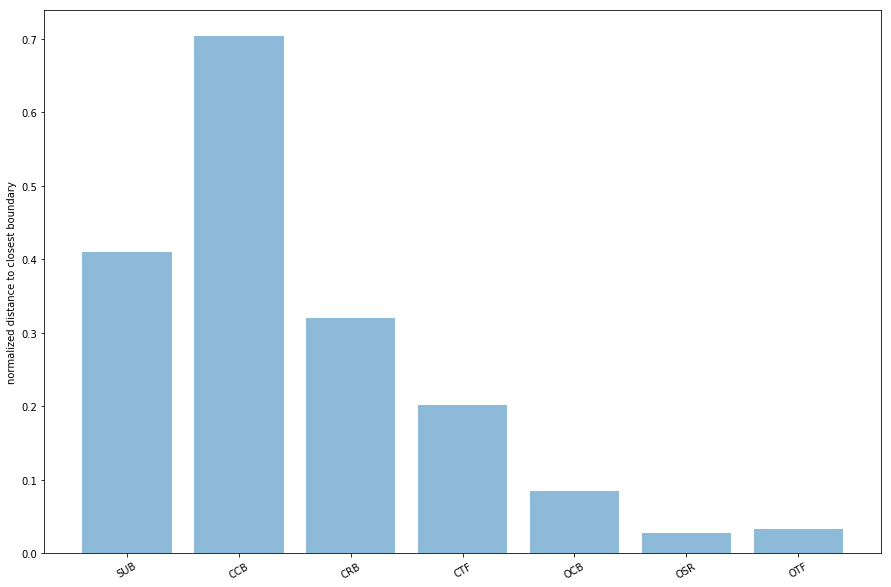

In [16]:
objects = ('SUB', 'CCB', 'CRB', 'CTF', 'OCB', 'OSR', 'OTF')
y_pos = np.arange(len(objects))
performance = norm_bound_dist
 
plt.figure(figsize=(15,10))
plt.bar(y_pos, performance, alpha=0.5)
plt.xticks(y_pos, objects, rotation = 30)
plt.ylabel('normalized distance to closest boundary')

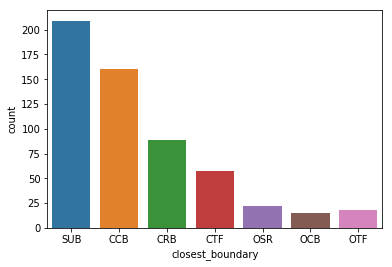

In [17]:
sns.countplot(boundary_distances["closest_boundary"])

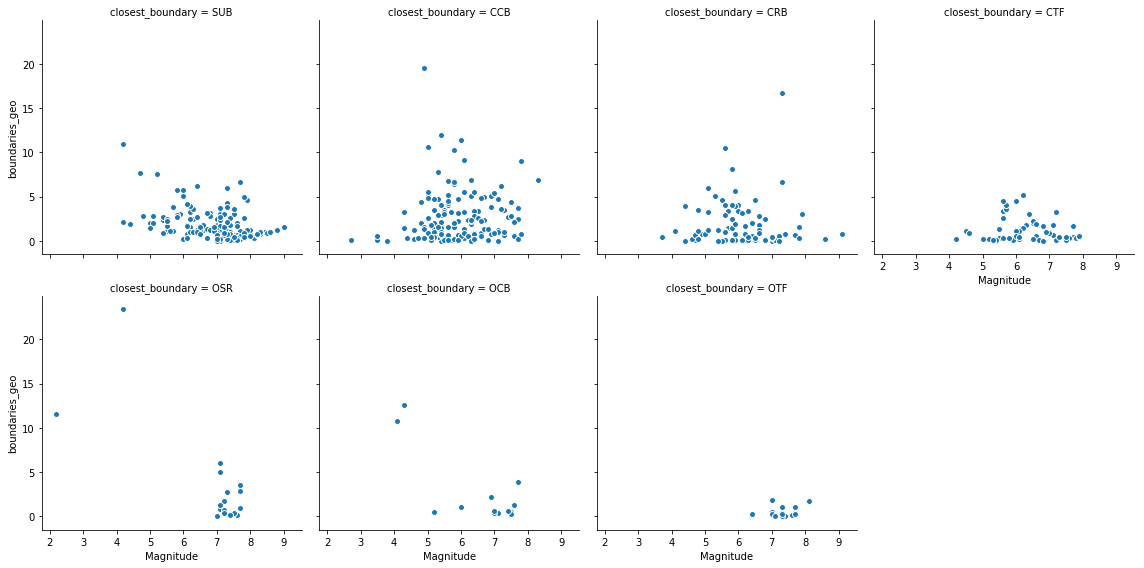

In [18]:
#plt.scatter(x=boundary_distances["Magnitude"], y=boundary_distances["boundaries_geo"])
#plt.scatter(x=boundary_distances["Magnitude"], y=boundary_distances["sub_geo"])
g = sns.FacetGrid(boundary_distances,  col = "closest_boundary", col_wrap=4, size = 4)
g = g.map(plt.scatter, "Magnitude", "boundaries_geo", edgecolor="w")

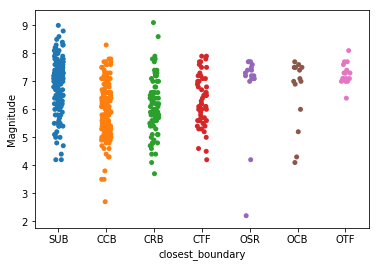

In [19]:
sns.stripplot(x="closest_boundary", y="Magnitude", data=boundary_distances, jitter=True)

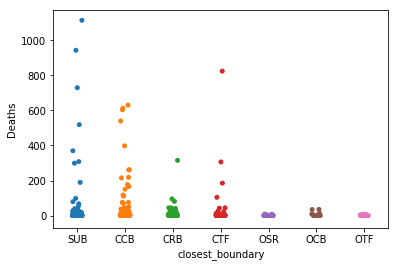

In [20]:
sns.stripplot(x="closest_boundary", y="Deaths", data=boundary_distances, jitter=True)

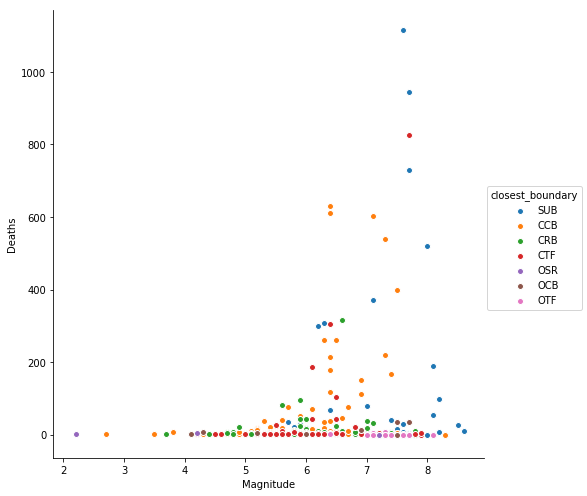

In [21]:
g2 = sns.FacetGrid(boundary_distances,  hue="closest_boundary", size = 7)
g2 = g2.map(plt.scatter, "Magnitude", "Deaths", edgecolor="w").add_legend()

In [4]:
earthquakes2_geo = earthquakes2_gdf["geometry"]
len(earthquakes2_geo)
#earthquakes2_gdf

24638

def closest_boundary2(geoseries):
    min_distances = []
    
    for i, point in enumerate(earthquakes2_geo):
        min_dist = np.min([point.distance(line) for line in geoseries])
        min_distances.append(min_dist)
    return min_distances

dict_list = [boundaries_geo, sub_geo, ccb_geo, crb_geo, ctf_geo, ocb_geo, osr_geo, otf_geo]

total_min_distances2 = []

for geoseries in dict_list:
    min_distances = closest_boundary2(geoseries)
    total_min_distances2.append(min_distances)
    
total_min_distances2

boundary_distances2 = pd.DataFrame(total_min_distances2)
boundary_distances2 = boundary_distances2.transpose()
boundary_distances2

#boundary_distances2.columns = ["boundaries_geo2", "sub_geo2", "ccb_geo2", "crb_geo2", "ctf_geo2", "ocb_geo2", 
                               #"osr_geo2", "otf_geo2"]
earthquakes_dist2 = pd.concat([earthquakes2_gdf, boundary_distances2], axis=1)
#print(len(earthquakes_dist2))
#boundary_distances
#print(len(earthquakes2_gdf))
#earthquakes_dist.to_csv("MR_Data/Earthquake_boundary_distances")
#boundary_distances2
#earthquakes_dist2
earthquakes_dist2.to_csv("MR_Data/Earthquake_boundary_distances2")

In [4]:
boundary_distances2 = pd.read_csv("MR_Data/Earthquake_boundary_distances2")
boundary_distances2 = boundary_distances2.drop("Unnamed: 0", axis = 1)

In [5]:
boundary_distances2

,date,depth,mag,id,place,geometry,date.1,depth.1,mag.1,id.1,...,geometry.1,boundaries_geo2,sub_geo2,ccb_geo2,crb_geo2,ctf_geo2,ocb_geo2,osr_geo2,otf_geo2,closest_boundary2
0,19600102,15.00,6.3,iscgem877909,Bouvet Island region,POINT (-1.89 -55.877),19600102,15.00,6.3,iscgem877909,...,POINT (-1.89 -55.877),0.221410,22.051172,32.701335,30.812117,26.219884,27.611902,0.355460,0.221410,OTF
1,19600103,15.00,5.7,iscgem877920,"northern Xinjiang, China",POINT (84.542 43.7),19600103,15.00,5.7,iscgem877920,...,POINT (84.542 43.7),14.366975,30.915059,14.366975,18.764151,14.530203,27.458720,32.675968,27.458720,CCB
2,19600104,15.00,6.1,iscgemsup877930,Djibouti,POINT (42.609 11.374),19600104,15.00,6.1,iscgemsup877930,...,POINT (42.609 11.374),0.346336,24.585383,18.971821,0.346336,1.259295,14.433952,1.221475,2.743895,CRB
3,19600107,55.00,5.5,iscgem877960,"Nicobar Islands, India region",POINT (94.547 6.352),19600107,55.00,5.5,iscgem877960,...,POINT (94.547 6.352),0.259956,2.108272,8.276883,1.254022,0.259956,4.269910,0.487571,0.855725,CTF
4,19600107,15.00,5.6,iscgem877954,"Nicobar Islands, India region",POINT (94.756 6.418),19600107,15.00,5.6,iscgem877954,...,POINT (94.756 6.418),0.054731,2.327099,8.166058,1.221409,0.054731,4.319760,0.492587,0.732100,CTF
5,19600107,35.00,6.2,iscgem877956,South Sandwich Islands region,POINT (-27.278 -55.591),19600107,35.00,6.2,iscgem877956,...,POINT (-27.278 -55.591),0.411938,0.411938,7.314302,7.007927,4.894661,2.280326,2.280326,1.489146,SUB
6,19600108,35.00,6.0,iscgem877967,South Sandwich Islands region,POINT (-27.475 -55.585),19600108,35.00,6.0,iscgem877967,...,POINT (-27.475 -55.585),0.449286,0.449286,7.117457,6.870418,4.887415,2.088277,2.088277,1.307664,SUB
7,19600108,15.00,5.9,iscgem877965,South Sandwich Islands region,POINT (-27.115 -55.57),19600108,15.00,5.9,iscgem877965,...,POINT (-27.115 -55.57),0.355971,0.355971,7.477691,7.141388,4.932414,2.433977,2.433977,1.632865,SUB
8,19600111,15.00,5.6,iscgem877983,near the south coast of Myanmar,POINT (95.83199999999999 16.046),19600111,15.00,5.6,iscgem877983,...,POINT (95.83199999999999 16.046),0.457863,4.427331,0.874442,2.031042,0.457863,3.708297,3.145046,6.147865,CTF
9,19600112,10.00,5.8,iscgem877990,Taiwan region,POINT (122.323 23.401),19600112,10.00,5.8,iscgem877990,...,POINT (122.323 23.401),0.300413,2.574879,1.807350,1.467501,1.012547,0.300413,2.473092,0.300413,OCB


In [25]:
conditions = [
    (boundary_distances2['boundaries_geo2'] == boundary_distances2['sub_geo2']), 
    (boundary_distances2['boundaries_geo2'] == boundary_distances2['ccb_geo2']),
    (boundary_distances2['boundaries_geo2'] == boundary_distances2['crb_geo2']), 
    (boundary_distances2['boundaries_geo2'] == boundary_distances2['ctf_geo2']),
    (boundary_distances2['boundaries_geo2'] == boundary_distances2['ocb_geo2']), 
    (boundary_distances2['boundaries_geo2'] == boundary_distances2['osr_geo2']), 
    (boundary_distances2['boundaries_geo2'] == boundary_distances2['otf_geo2'])]
choices = ['SUB', 'CCB', 'CRB', 'CTF', 'OCB', 'OSR', 'OTF']
boundary_distances2['closest_boundary2'] = np.select(conditions, choices, default=np.nan)

In [26]:
boundary_distances2.head()

,date,depth,mag,id,place,geometry,date.1,depth.1,mag.1,id.1,...,geometry.1,boundaries_geo2,sub_geo2,ccb_geo2,crb_geo2,ctf_geo2,ocb_geo2,osr_geo2,otf_geo2,closest_boundary2
0,19600102,15.0,6.3,iscgem877909,Bouvet Island region,POINT (-1.89 -55.877),19600102,15.0,6.3,iscgem877909,...,POINT (-1.89 -55.877),0.221410,22.051172,32.701335,30.812117,26.219884,27.611902,0.355460,0.221410,OTF
1,19600103,15.0,5.7,iscgem877920,"northern Xinjiang, China",POINT (84.542 43.7),19600103,15.0,5.7,iscgem877920,...,POINT (84.542 43.7),14.366975,30.915059,14.366975,18.764151,14.530203,27.458720,32.675968,27.458720,CCB
2,19600104,15.0,6.1,iscgemsup877930,Djibouti,POINT (42.609 11.374),19600104,15.0,6.1,iscgemsup877930,...,POINT (42.609 11.374),0.346336,24.585383,18.971821,0.346336,1.259295,14.433952,1.221475,2.743895,CRB
3,19600107,55.0,5.5,iscgem877960,"Nicobar Islands, India region",POINT (94.547 6.352),19600107,55.0,5.5,iscgem877960,...,POINT (94.547 6.352),0.259956,2.108272,8.276883,1.254022,0.259956,4.269910,0.487571,0.855725,CTF
4,19600107,15.0,5.6,iscgem877954,"Nicobar Islands, India region",POINT (94.756 6.418),19600107,15.0,5.6,iscgem877954,...,POINT (94.756 6.418),0.054731,2.327099,8.166058,1.221409,0.054731,4.319760,0.492587,0.732100,CTF


In [27]:
boundary_distances2["closest_boundary2"].value_counts()

SUB    12152
OTF     2627
CCB     2566
OSR     2491
CRB     2057
CTF     1768
OCB      977
Name: closest_boundary2, dtype: int64

sub_geo, ccb_geo, crb_geo, ctf_geo, ocb_geo, osr_geo, otf_geo

In [28]:
bound_dist_count2 = np.array([12152, 2566, 2057, 1768, 977, 2491, 2627])
#bound_length

In [29]:
norm_bound_dist2 = np.divide(bound_dist_count, bound_length)
norm_bound_dist2

array([ 0.40967557,  0.70433262,  0.32077188,  0.2015831 ,  0.08536825,
        0.02714659,  0.03337681])

Text(0,0.5,'normalized distance to closest boundary')

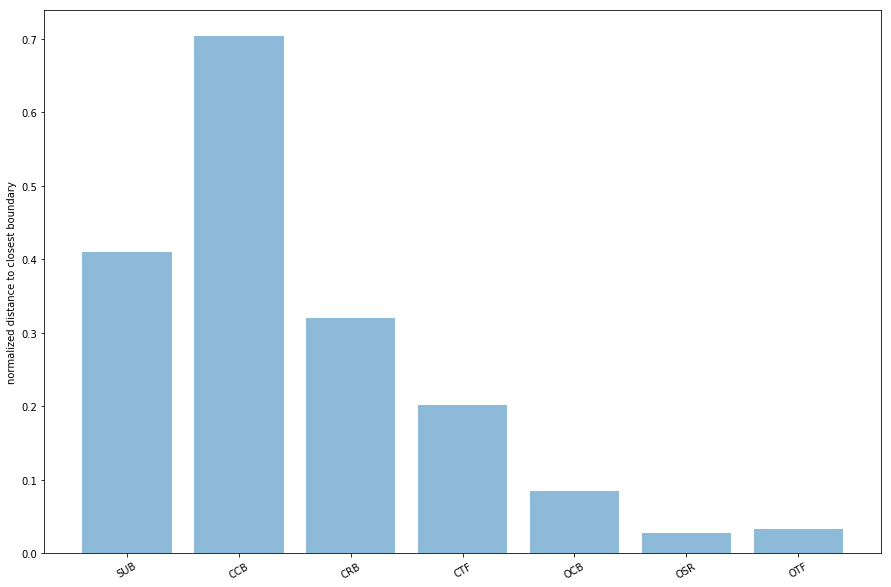

In [30]:
objects = ('SUB', 'CCB', 'CRB', 'CTF', 'OCB', 'OSR', 'OTF')
y_pos = np.arange(len(objects))
performance = norm_bound_dist2
 
plt.figure(figsize=(15,10))
plt.bar(y_pos, performance, alpha=0.5)
plt.xticks(y_pos, objects, rotation = 30)
plt.ylabel('normalized distance to closest boundary')

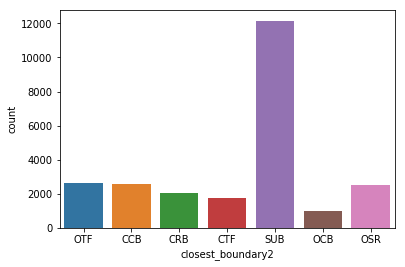

In [31]:
sns.countplot(boundary_distances2["closest_boundary2"])

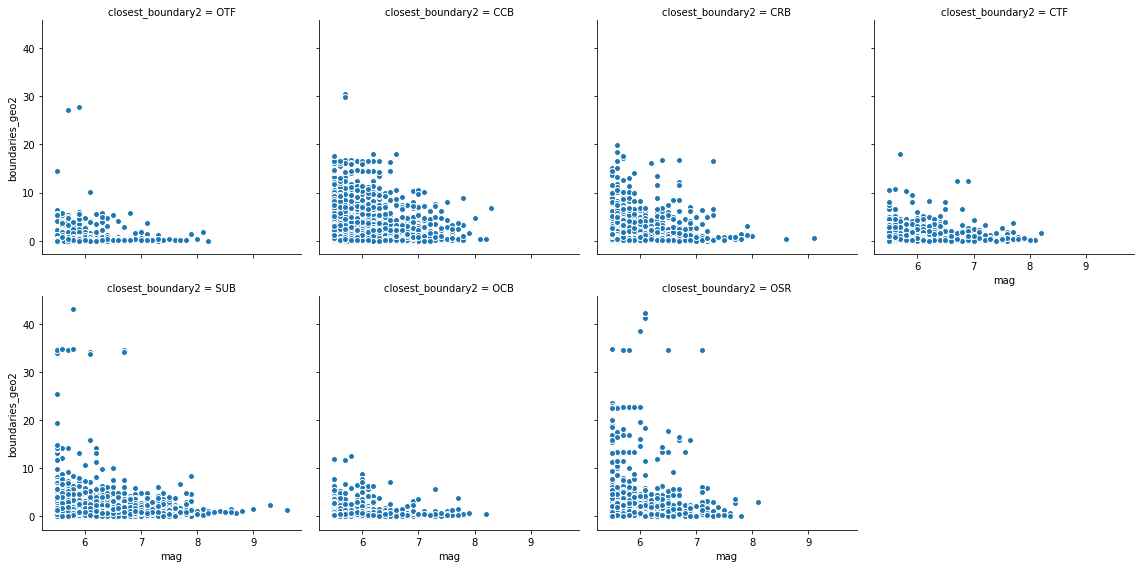

In [32]:
g = sns.FacetGrid(boundary_distances2,  col = "closest_boundary2", col_wrap=4, size = 4)
g = g.map(plt.scatter, "mag", "boundaries_geo2", edgecolor="w")

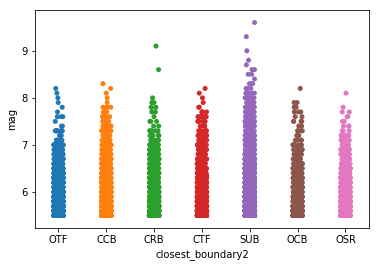

In [33]:
sns.stripplot(x="closest_boundary2", y="mag", data=boundary_distances2, jitter=True)

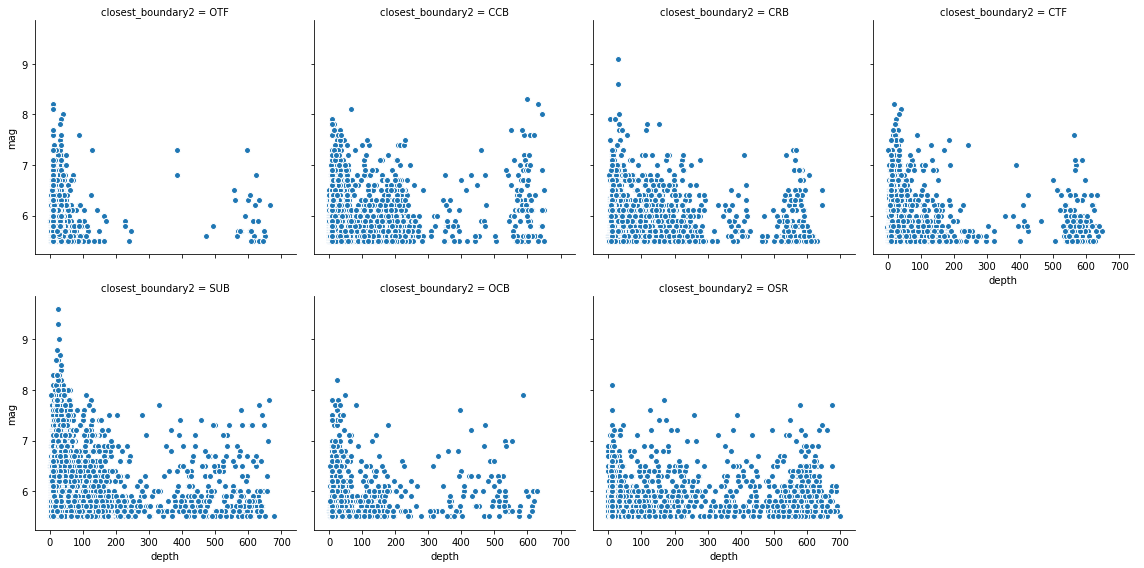

In [34]:
#g2 = sns.FacetGrid(boundary_distances2,  hue="closest_boundary2", size = 7)
#g2 = g2.map(plt.scatter, "depth", "mag", edgecolor="w").add_legend()
g2 = sns.FacetGrid(boundary_distances2,  col = "closest_boundary2", col_wrap=4, size = 4)
g2 = g2.map(plt.scatter, "depth", "mag", edgecolor="w")

min_dist = np.empty(len(earthquakes_gdf))
for i, point in enumerate(earthquakes_geo):
    min_dist[i] = np.min([point.distance(line) for line in sub_geo])
earthquakes_gdf['min_dist_to_lines_sub'] = min_dist
#earthquakes_gdf

In [35]:
boundary_sub = boundary_distances[boundary_distances["closest_boundary"]=="SUB"]
#boundary_sub.head()
#type(boundary_sub)
boundary_sub_gdf = gpd.GeoDataFrame(boundary_sub, crs = {'init': 'epsg:4326'})
#type(boundary_sub_gdf)
#type(boundary_sub_gdf.geometry)
#boundary_sub_gdf.crs

In [36]:
boundary_distances = gpd.GeoDataFrame(boundary_distances, crs = {'init': 'epsg:4326'}, geometry = earthquakes_gdf.geometry)

In [37]:
#type(boundary_distances)
boundary_distances.head()

,Country,Date,Deaths,Lat,Long,Magnitude,geometry,boundaries_geo,sub_geo,ccb_geo,crb_geo,ctf_geo,ocb_geo,osr_geo,otf_geo,closest_boundary
0,"Mindanao, Philippines","January 1, 2001",0.0,6.898,126.579,7.5,POINT (126.579 6.898),0.662349,0.662349,4.660357,4.846614,5.179907,4.561420,6.785813,5.817892,SUB
1,Vanuatu,"January 9, 2001",0.0,-14.928,167.170,7.1,POINT (167.17 -14.928),0.908836,0.908836,1.269794,1.724729,12.466521,7.513063,1.933371,4.214104,SUB
2,"Kodiak Island region, Alaska, United States","January 10, 2001",0.0,57.078,-153.211,7.0,POINT (-153.211 57.078),1.342746,1.342746,7.771425,44.489400,16.161325,56.823301,22.907951,23.865337,SUB
3,Offshore El Salvador\nsee January 2001 El Salv...,"January 13, 2001",944.0,13.049,-88.660,7.7,POINT (-88.66 13.049),1.068072,1.068072,3.459298,1.916418,3.336281,7.879090,8.490126,3.822822,SUB
4,"Gujarat, India\nsee 2001 Gujarat earthquake","January 26, 2001",NaN,23.419,70.232,7.7,POINT (70.232 23.419),3.756432,23.895157,3.756432,5.762146,3.756432,5.292352,13.775858,5.292352,CCB


In [38]:
earthquakes_dist2_test = gpd.GeoDataFrame(boundary_distances2, crs = {'init': 'epsg:4326'}, geometry = earthquakes2_gdf.geometry)

In [1]:
fig, ax = plt.subplots(figsize = (20, 20))
ax.set_aspect('equal')
plates_gdf.plot(ax=ax, color='blue', edgecolor='white', alpha = 0.3, lw = 3.0)
countries_gdf.plot(ax=ax, edgecolor='black', alpha = 0.2)
boundaries_gdf.plot(ax=ax, column = "STEPCLASS", cmap = "rainbow", lw = 1, legend = True)
#boundary_distances.plot(ax=ax, markersize = 5, column = "closest_boundary", cmap = "rainbow")
earthquakes_dist2_test.plot(ax=ax, markersize = 5, column = "closest_boundary2", cmap = "rainbow")

NameError: name 'plt' is not defined

(array([  2.15190000e+04,   1.95400000e+03,   5.61000000e+02,
          1.98000000e+02,   9.60000000e+01,   5.50000000e+01,
          6.30000000e+01,   1.15000000e+02,   1.50000000e+01,
          3.00000000e+00,   3.10000000e+01,   1.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          7.00000000e+00,   1.20000000e+01,   1.00000000e+00,
          0.00000000e+00,   3.00000000e+00]),
 array([  1.60635699e-05,   2.15715126e+00,   4.31428646e+00,
          6.47142165e+00,   8.62855685e+00,   1.07856920e+01,
          1.29428272e+01,   1.50999624e+01,   1.72570976e+01,
          1.94142328e+01,   2.15713680e+01,   2.37285032e+01,
          2.58856384e+01,   2.80427736e+01,   3.01999088e+01,
          3.23570440e+01,   3.45141792e+01,   3.66713144e+01,
          3.88284496e+01,   4.09855848e+01,   4.31427200e+01]),
 <a list of 20 Patch objects>)

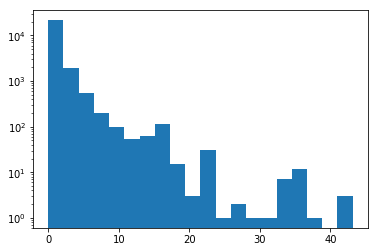

In [40]:
plt.yscale('log', nonposy='clip')
plt.hist(boundary_distances2["boundaries_geo2"], bins = 20)

In [41]:
plates_gdf.crs

{'init': 'epsg:4326'}

In [9]:
volcanoes_gdf.iloc[[86, 96, 263, 276]]

,Name,Country,Type,lat,lng,Elevation,geometry
86,Columbia River Flood Basalts,USA,Flood Basalt,NaN,NaN,NaN,None
96,Deccan Traps,India,Flood Basalt,NaN,NaN,NaN,None
263,Navajo Volcanic Field,United States,Volcanic Field,NaN,NaN,2740.0,None
276,Oahu,United States,Shield,NaN,NaN,1220.0,None


In [10]:
volcanoes_gdf = volcanoes_gdf.drop([86, 96, 263, 276])
#volcanoes_gdf["Type"].value_counts()
#volcanoes_gdf[volcanoes_gdf["Type"] == '']
#len(volcanoes_gdf)
#volcanoes_gdf[volcanoes_gdf["geometry"].isnull()]

In [11]:
vol_geo = volcanoes_gdf.geometry
#vol_geo
strato_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Stratovolcano")].geometry
#strato_vol
caldera_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Caldera")].geometry
shield_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Shield")].geometry
complex_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Complex Volcano")].geometry
submarine_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Submarine")].geometry
vol_field_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Volcanic Field")].geometry
cinder_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Cinder Cone")].geometry
dome_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Dome")].geometry
fissure_vents_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Fissure vents")].geometry
somma_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Somma Volcano")].geometry
maar_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Maar")].geometry
proclastic_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Pyroclastic Cone")].geometry
flood_basalt_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Flood Basalt")].geometry
tuff_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Tuff Ring")].geometry
plug_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Plug")].geometry
#noname_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("")].geometry
#type(noname_vol)

In [47]:
#earthquakes_gdf[earthquakes_gdf["geometry"].isnull()]
#earthquakes_gdf = earthquakes_gdf.drop(earthquakes_gdf[earthquakes_gdf["geometry"].isnull()].index)
earthquakes_geo = earthquakes_gdf["geometry"]

In [48]:
def quake_dist(geoseries):
    dist_list = []
    for quake in earthquakes_geo:
        dist = np.min([quake.distance(vol) for vol in geoseries])
        dist_list.append(dist)
    return dist_list

In [49]:
vol_type_list = [vol_geo, strato_vol, caldera_vol, shield_vol, complex_vol, submarine_vol, vol_field_vol, cinder_vol, 
                 dome_vol, fissure_vents_vol, somma_vol, maar_vol, proclastic_vol, tuff_vol, 
                 plug_vol, noname_vol] #, flood_basalt_vol]

total_dist_list = []

for geoseries in vol_type_list:
    dist_list = quake_dist(geoseries)
    total_dist_list.append(dist_list)
    
total_dist_list

[[2.2283278484100975,
  0.73611412158714218,
  1.7602741263791744,
  0.73330825714702064,
  11.21068173662958,
  0.11200446419674007,
  0.8670893840890892,
  0.13416407864998769,
  10.308496010573027,
  1.1751944519950759,
  1.0121709341805845,
  1.0155614210868937,
  6.9592416971966111,
  0.26315394733881081,
  8.5874751819146464,
  11.813038643803713,
  0.81558874440494367,
  5.1523479113895227,
  1.8555069388175407,
  30.950067996694287,
  5.2246555867348832,
  0.74669203825941477,
  1.7350426507726033,
  7.7224266911379642,
  3.7284039480721516,
  4.1868643398132672,
  7.4266021840408296,
  0.46389654018973653,
  21.004816995156137,
  0.79275216808282178,
  18.512136370500297,
  1.0299300947151711,
  14.558933099647104,
  2.2423052869758866,
  0.23837994882120303,
  2.1272322393194401,
  0.96687589689680753,
  3.2490013850412582,
  7.8650158296089936,
  13.496530220764152,
  1.6857906157052844,
  12.31929661141414,
  3.8127473034545587,
  0.75622880135578208,
  12.329864962764194,


In [50]:
vol_dist = pd.DataFrame(total_dist_list)
vol_dist = vol_dist.transpose()
vol_dist.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,2.228328,2.228328,5.717848,27.949237,5.049816,22.875399,41.824519,31.434211,26.824282,112.987045,47.715925,88.236520,30.673889,241.361227,234.331852,2.228328
1,0.736114,0.736114,2.157054,0.811409,21.431340,10.950473,75.737510,14.873281,24.998355,157.551075,63.816618,130.853280,57.190510,285.220615,278.310761,0.736114
2,1.760274,1.760274,4.962951,10.425956,75.184336,25.740686,35.048007,46.827127,2.292484,134.320894,168.427514,34.942140,158.514654,43.366068,50.090095,1.760274
3,0.733308,0.927718,0.733308,1.102162,2.352692,27.030379,26.965522,2.032762,79.623248,76.194201,106.765053,37.462954,95.888755,38.501608,35.394169,0.733308
4,11.210682,11.210682,33.860433,31.121565,31.995135,74.858098,46.661122,89.928281,45.083361,54.843657,58.452186,35.393051,26.135848,183.317331,176.209646,11.210682


In [51]:
vol_dist.columns = ["vol", "strato", "caldera", "shield", "complex", "submarine", "vol_field", "cinder", 
                 "dome", "fissure_vents", "somma", "maar", "proclastic", "tuff", 
                 "plug", "noname"]
quake_vol_dist = pd.concat([earthquakes_gdf, vol_dist], axis=1)
#print(len(quake_vol_dist))
#print(len(earthquakes_gdf))
quake_vol_dist

,Country,Date,Deaths,Lat,Long,Magnitude,geometry,vol,strato,caldera,...,vol_field,cinder,dome,fissure_vents,somma,maar,proclastic,tuff,plug,noname
0,"Mindanao, Philippines","January 1, 2001",0.0,6.898,126.579,7.5,POINT (126.579 6.898),2.228328,2.228328,5.717848,...,41.824519,31.434211,26.824282,112.987045,47.715925,88.236520,30.673889,241.361227,234.331852,2.228328
1,Vanuatu,"January 9, 2001",0.0,-14.928,167.170,7.1,POINT (167.17 -14.928),0.736114,0.736114,2.157054,...,75.737510,14.873281,24.998355,157.551075,63.816618,130.853280,57.190510,285.220615,278.310761,0.736114
2,"Kodiak Island region, Alaska, United States","January 10, 2001",0.0,57.078,-153.211,7.0,POINT (-153.211 57.078),1.760274,1.760274,4.962951,...,35.048007,46.827127,2.292484,134.320894,168.427514,34.942140,158.514654,43.366068,50.090095,1.760274
3,Offshore El Salvador\nsee January 2001 El Salv...,"January 13, 2001",944.0,13.049,-88.660,7.7,POINT (-88.66 13.049),0.733308,0.927718,0.733308,...,26.965522,2.032762,79.623248,76.194201,106.765053,37.462954,95.888755,38.501608,35.394169,0.733308
4,"Gujarat, India\nsee 2001 Gujarat earthquake","January 26, 2001",NaN,23.419,70.232,7.7,POINT (70.232 23.419),11.210682,11.210682,33.860433,...,46.661122,89.928281,45.083361,54.843657,58.452186,35.393051,26.135848,183.317331,176.209646,11.210682
5,El Salvador\nsee February 2001 El Salvador ear...,"February 13, 2001",315.0,13.671,-88.938,6.6,POINT (-88.938 13.671),0.112004,0.356910,0.112004,...,26.311075,2.521223,79.036085,76.344440,106.873812,36.852543,96.001892,37.838516,34.713739,0.112004
6,"Southern Sumatra, Indonesia","February 13, 2001",0.0,-4.680,102.562,7.4,POINT (102.562 -4.68),0.867089,0.867089,8.163052,...,58.365567,52.657150,47.689863,92.918517,71.778391,65.461698,19.061952,219.909784,213.040032,0.867089
7,El Salvador\nsee February 2001 El Salvador ear...,"February 17, 2001",1.0,13.790,-89.110,4.1,POINT (-89.11 13.79),0.134164,0.189737,0.134164,...,26.109006,2.728828,78.826945,76.490477,107.010058,36.644079,96.139238,37.639482,34.529758,0.134164
8,"Western Sichuan, China","February 23, 2001",3.0,29.513,101.129,5.6,POINT (101.129 29.513),10.308496,10.308496,25.201438,...,31.519184,58.737472,30.534258,85.562378,54.068134,66.346539,18.686351,213.560748,206.381188,10.308496
9,Molucca Sea,"February 24, 2001",0.0,1.271,126.249,7.1,POINT (126.249 1.271),1.175194,1.175194,1.221181,...,47.449175,29.874605,32.425589,113.851074,52.708470,88.160020,34.193136,241.958153,234.978388,1.175194


In [68]:
len(quake_vol_dist)

570

In [52]:
conditions = [
    (quake_vol_dist['vol'] == quake_vol_dist['strato']), 
    (quake_vol_dist['vol'] == quake_vol_dist['caldera']),
    (quake_vol_dist['vol'] == quake_vol_dist['shield']), 
    (quake_vol_dist['vol'] == quake_vol_dist['complex']),
    (quake_vol_dist['vol'] == quake_vol_dist['submarine']), 
    (quake_vol_dist['vol'] == quake_vol_dist['vol_field']),
    (quake_vol_dist['vol'] == quake_vol_dist['cinder']),
    (quake_vol_dist['vol'] == quake_vol_dist['dome']),
    (quake_vol_dist['vol'] == quake_vol_dist['fissure_vents']),
    (quake_vol_dist['vol'] == quake_vol_dist['somma']),
    (quake_vol_dist['vol'] == quake_vol_dist['maar']),
    (quake_vol_dist['vol'] == quake_vol_dist['proclastic']),
    (quake_vol_dist['vol'] == quake_vol_dist['tuff']),
    (quake_vol_dist['vol'] == quake_vol_dist['plug']),
    (quake_vol_dist['vol'] == quake_vol_dist['noname'])]
choices = ['strato', 'caldera', 'shield', 'complex', 'submarine', 'vol_field', 'cinder', 'dome', 'fissure_vents', 
           'somma', 'maar', 'proclastic', 'tuff', 'plug', 'noname']
quake_vol_dist['closest_vol'] = np.select(conditions, choices, default=np.nan)

In [53]:
quake_vol_dist

,Country,Date,Deaths,Lat,Long,Magnitude,geometry,vol,strato,caldera,...,cinder,dome,fissure_vents,somma,maar,proclastic,tuff,plug,noname,closest_vol
0,"Mindanao, Philippines","January 1, 2001",0.0,6.898,126.579,7.5,POINT (126.579 6.898),2.228328,2.228328,5.717848,...,31.434211,26.824282,112.987045,47.715925,88.236520,30.673889,241.361227,234.331852,2.228328,strato
1,Vanuatu,"January 9, 2001",0.0,-14.928,167.170,7.1,POINT (167.17 -14.928),0.736114,0.736114,2.157054,...,14.873281,24.998355,157.551075,63.816618,130.853280,57.190510,285.220615,278.310761,0.736114,strato
2,"Kodiak Island region, Alaska, United States","January 10, 2001",0.0,57.078,-153.211,7.0,POINT (-153.211 57.078),1.760274,1.760274,4.962951,...,46.827127,2.292484,134.320894,168.427514,34.942140,158.514654,43.366068,50.090095,1.760274,strato
3,Offshore El Salvador\nsee January 2001 El Salv...,"January 13, 2001",944.0,13.049,-88.660,7.7,POINT (-88.66 13.049),0.733308,0.927718,0.733308,...,2.032762,79.623248,76.194201,106.765053,37.462954,95.888755,38.501608,35.394169,0.733308,caldera
4,"Gujarat, India\nsee 2001 Gujarat earthquake","January 26, 2001",NaN,23.419,70.232,7.7,POINT (70.232 23.419),11.210682,11.210682,33.860433,...,89.928281,45.083361,54.843657,58.452186,35.393051,26.135848,183.317331,176.209646,11.210682,strato
5,El Salvador\nsee February 2001 El Salvador ear...,"February 13, 2001",315.0,13.671,-88.938,6.6,POINT (-88.938 13.671),0.112004,0.356910,0.112004,...,2.521223,79.036085,76.344440,106.873812,36.852543,96.001892,37.838516,34.713739,0.112004,caldera
6,"Southern Sumatra, Indonesia","February 13, 2001",0.0,-4.680,102.562,7.4,POINT (102.562 -4.68),0.867089,0.867089,8.163052,...,52.657150,47.689863,92.918517,71.778391,65.461698,19.061952,219.909784,213.040032,0.867089,strato
7,El Salvador\nsee February 2001 El Salvador ear...,"February 17, 2001",1.0,13.790,-89.110,4.1,POINT (-89.11 13.79),0.134164,0.189737,0.134164,...,2.728828,78.826945,76.490477,107.010058,36.644079,96.139238,37.639482,34.529758,0.134164,caldera
8,"Western Sichuan, China","February 23, 2001",3.0,29.513,101.129,5.6,POINT (101.129 29.513),10.308496,10.308496,25.201438,...,58.737472,30.534258,85.562378,54.068134,66.346539,18.686351,213.560748,206.381188,10.308496,strato
9,Molucca Sea,"February 24, 2001",0.0,1.271,126.249,7.1,POINT (126.249 1.271),1.175194,1.175194,1.221181,...,29.874605,32.425589,113.851074,52.708470,88.160020,34.193136,241.958153,234.978388,1.175194,strato


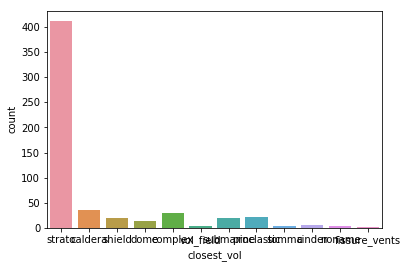

In [54]:
sns.countplot(quake_vol_dist["closest_vol"])

Stratovolcano                 275
Caldera                        40
Shield                         33
Complex Volcano                16
Submarine                      11
Volcanic Field                 10
                               10
Cinder Cone                     9
Dome                            8
Fissure vents                   4
Somma Volcano                   3
Maar                            3
Pyroclastic Cone                3
Plug                            1
Tuff Ring                       1

In [64]:
volcanoes_gdf["Type"].value_counts()

            Stratovolcano                 275
            Caldera                        40
            Shield                         33
            Complex Volcano                16
            Submarine                      11
            Volcanic Field                 10
                                           10
            Cinder Cone                     9
            Dome                            8
            Fissure vents                   4
            Somma Volcano                   3
            Pyroclastic Cone                3
            Maar                            3
            Plug                            1
            Tuff Ring                       1
Name: Type, dtype: int64

In [55]:
quake_vol_dist["closest_vol"].value_counts()

strato           412
caldera           36
complex           30
proclastic        21
submarine         20
shield            20
dome              13
cinder             6
vol_field          4
noname             4
somma              3
fissure_vents      1
Name: closest_vol, dtype: int64

In [56]:
dist_count = np.array([412, 36, 30, 21, 20, 20, 13, 6, 4, 4, 3, 1])
vol_count = np.array([275, 40, 16, 3, 33, 11, 8, 9, 10, 10, 3, 4])

In [57]:
normalized_dist = np.divide(dist_count, vol_count)
normalized_dist

array([ 1.49818182,  0.9       ,  1.875     ,  7.        ,  0.60606061,
        1.81818182,  1.625     ,  0.66666667,  0.4       ,  0.4       ,
        1.        ,  0.25      ])

Text(0,0.5,'normalized distance')

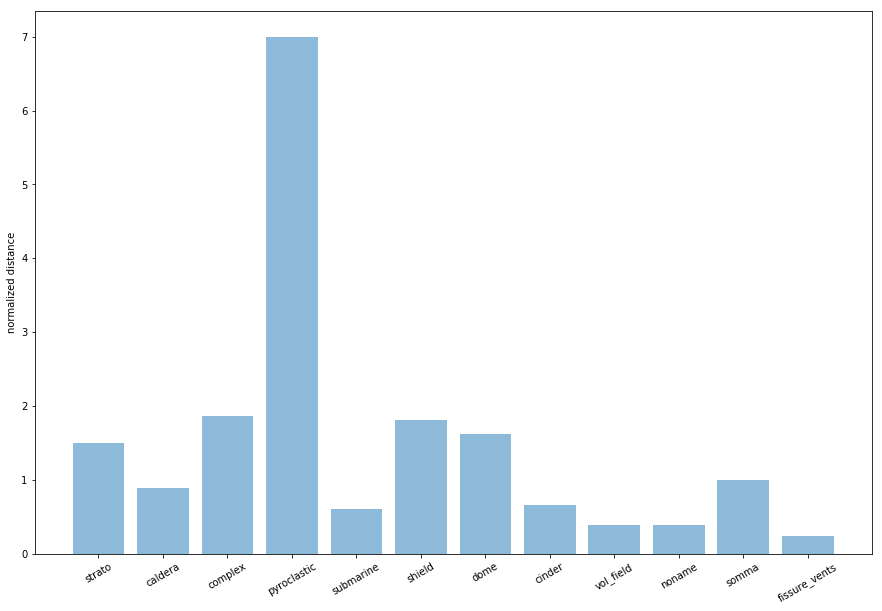

In [65]:
objects = ('strato', 'caldera', 'complex', 'pyroclastic', 'submarine', 'shield', 'dome', 'cinder', 'vol_field', 
           'noname', 'somma', 'fissure_vents')
y_pos = np.arange(len(objects))
performance = normalized_dist
 
plt.figure(figsize=(15,10))
plt.bar(y_pos, performance, alpha=0.5)
plt.xticks(y_pos, objects, rotation = 30)
plt.ylabel('normalized distance')

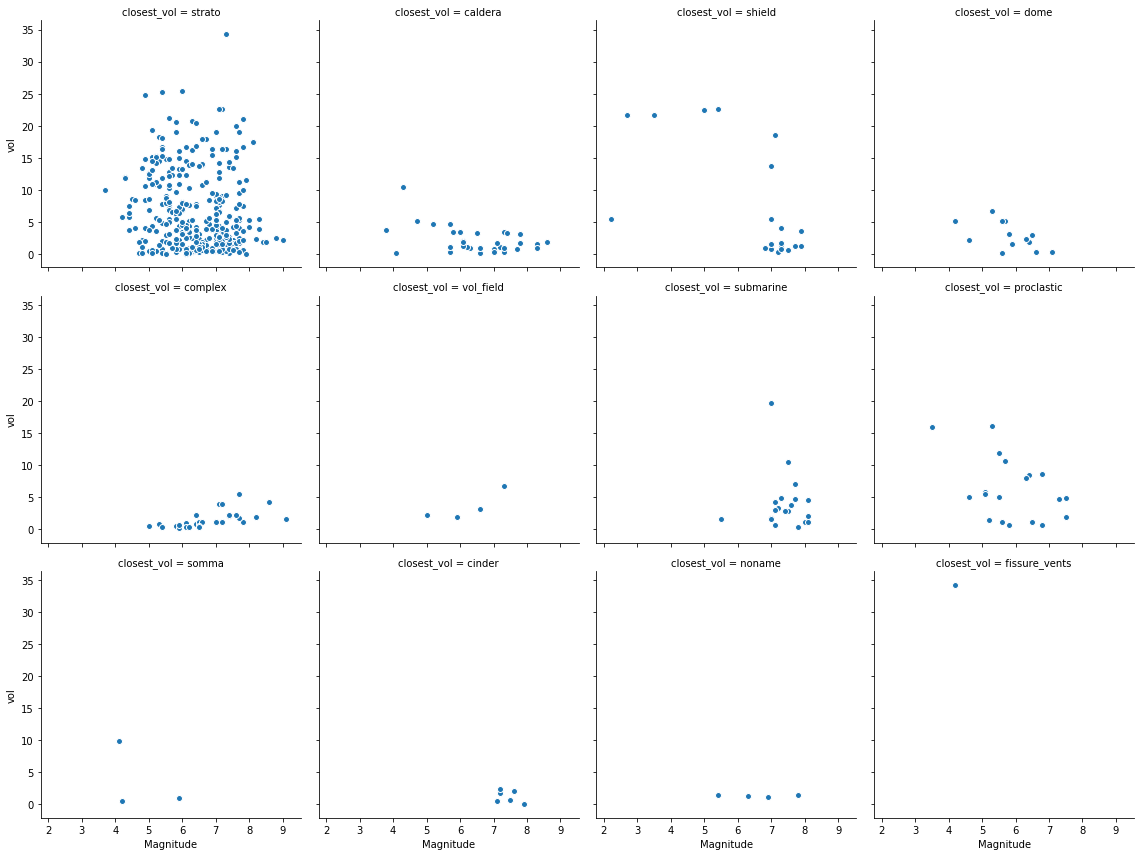

In [59]:
g3 = sns.FacetGrid(quake_vol_dist,  col = "closest_vol", col_wrap=4, size = 4)
g3 = g3.map(plt.scatter, "Magnitude", "vol", edgecolor="w")

[Text(0,0,'strato'),
 Text(0,0,'caldera'),
 Text(0,0,'complex'),
 Text(0,0,'pyroclastic'),
 Text(0,0,'shield'),
 Text(0,0,'submarine'),
 Text(0,0,'dome'),
 Text(0,0,'cinder'),
 Text(0,0,'vol_field'),
 Text(0,0,'noname'),
 Text(0,0,'somma'),
 Text(0,0,'fissure_vents')]

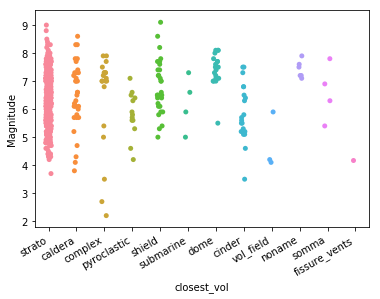

In [67]:
sp = sns.stripplot(x="closest_vol", y="Magnitude", data=quake_vol_dist, jitter=True)
sp.set_xticklabels(labels = ['strato', 'caldera', 'complex', 'pyroclastic', 'shield', 'submarine', 'dome', 
                             'cinder', 'vol_field', 'noname', 'somma', 'fissure_vents'], 
                   rotation=30, ha = "right")

[Text(0,0,'strato'),
 Text(0,0,'caldera'),
 Text(0,0,'complex'),
 Text(0,0,'pyroclastic'),
 Text(0,0,'shield'),
 Text(0,0,'submarine'),
 Text(0,0,'dome'),
 Text(0,0,'cinder'),
 Text(0,0,'vol_field'),
 Text(0,0,'noname'),
 Text(0,0,'somma'),
 Text(0,0,'fissure_vents')]

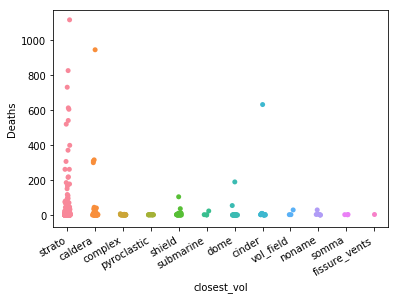

In [61]:
sp2 = sns.stripplot(x="closest_vol", y="Deaths", data=quake_vol_dist, jitter=True)
sp2.set_xticklabels(labels = ['strato', 'caldera', 'complex', 'pyroclastic', 'shield', 'submarine', 'dome', 'cinder', 'vol_field', 
                             'noname', 'somma', 'fissure_vents'], rotation=30, ha = "right")

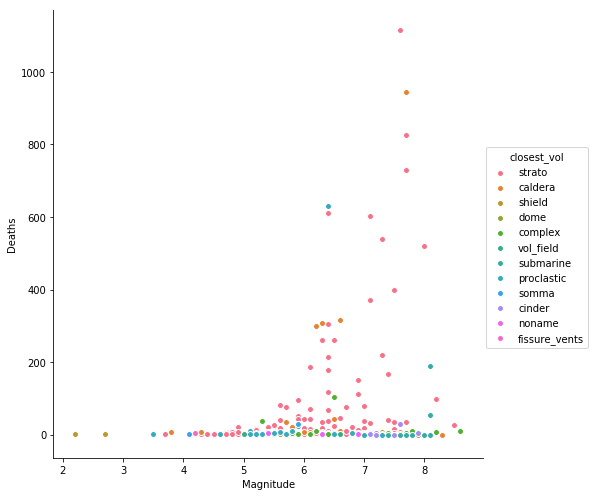

In [62]:
g5 = sns.FacetGrid(quake_vol_dist,  hue="closest_vol", size = 7)
g5 = g5.map(plt.scatter, "Magnitude", "Deaths", edgecolor="w").add_legend()

In [69]:
volcanoes_gdf

,Name,Country,Type,lat,lng,Elevation,geometry
0,Abu,Japan,Shield,34.50,131.60,641.0,POINT (131.6 34.5)
1,Acamarachi,Chile,Stratovolcano,-23.30,-67.62,6046.0,POINT (-67.62 -23.3)
2,Acatenango,Guatemala,Stratovolcano,14.50,-90.88,3976.0,POINT (-90.88 14.5)
3,Acigöl-Nevsehir,Turkey,Caldera,38.57,34.52,1689.0,POINT (34.52 38.57)
4,Adams,USA,Stratovolcano,46.21,-121.49,3742.0,POINT (-121.49 46.21)
5,Adams Seamount,Pacific Ocean,Submarine,-25.37,-129.27,-39.0,POINT (-129.27 -25.37)
6,Adatara,Japan,Stratovolcano,37.64,140.29,1718.0,POINT (140.29 37.64)
7,Adwa,Ethiopia,Stratovolcano,10.07,40.84,1733.0,POINT (40.84 10.07)
8,Afderà,Ethiopia,Stratovolcano,13.08,40.85,1295.0,POINT (40.85 13.08)
9,Agrigan,Mariana Islands,Stratovolcano,18.77,145.67,965.0,POINT (145.67 18.77)


In [70]:
orogen_gdf = gpd.read_file("MR_Data/PB2002_orogens.json")

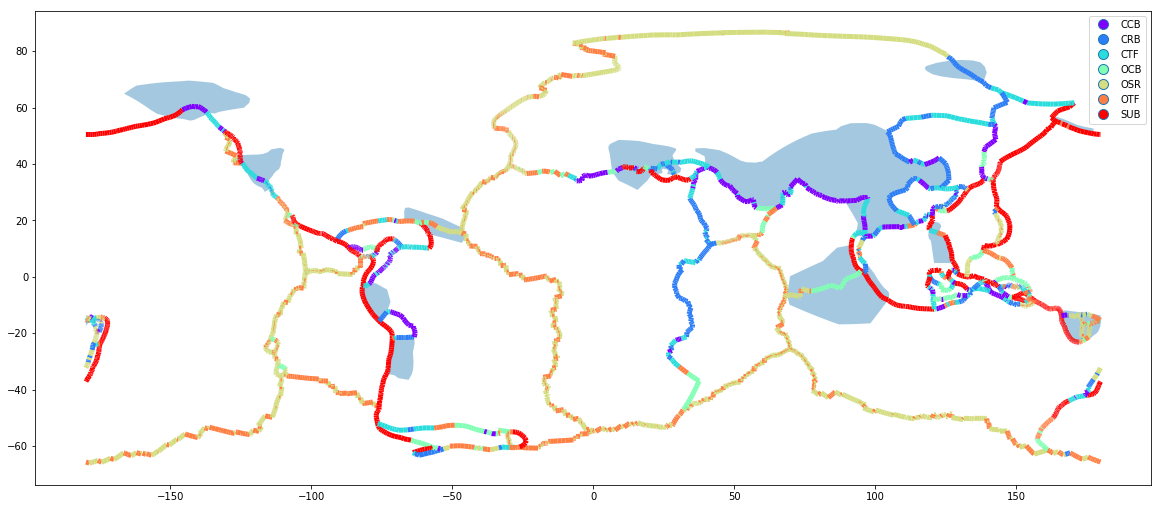

In [76]:
orogen_gdf = gpd.read_file("MR_Data/PB2002_orogens.json")
fig, ax = plt.subplots(figsize = (20, 20))
ax.set_aspect('equal')
plates_gdf.plot(ax=ax, color='blue', edgecolor='white', alpha = 0.3, lw = 3.0)
countries_gdf.plot(ax=ax, edgecolor='black', alpha = 0.2)
boundaries_gdf.plot(ax=ax, column = "STEPCLASS", cmap = "rainbow", lw = 5, legend = True)
orogen_gdf.plot(ax=ax, alpha = 0.4)
#boundary_distances.plot(ax=ax, markersize = 5, column = "closest_boundary", cmap = "rainbow")

In [1]:
earthquakes_2

NameError: name 'earthquakes_2' is not defined

In [5]:
def quake_dist(geoseries):
    dist_list = []
    for quake in earthquakes2_geo:
        dist = np.min([quake.distance(vol) for vol in geoseries])
        dist_list.append(dist)
    return dist_list

In [12]:
vol_type_list = [vol_geo, strato_vol, caldera_vol, shield_vol, complex_vol, submarine_vol, vol_field_vol, cinder_vol, 
                 dome_vol, fissure_vents_vol, somma_vol, maar_vol, proclastic_vol, tuff_vol, 
                 plug_vol]

total_dist_list = []

for geoseries in vol_type_list:
    dist_list = quake_dist(geoseries)
    total_dist_list.append(dist_list)
    
total_dist_list

[[21.468662487449002,
  29.134168325181349,
  2.1976753627412751,
  2.2931317014074888,
  2.179802743369224,
  2.3403642878834052,
  2.4225296695809542,
  2.3078832292817593,
  4.2329469639956505,
  2.9476651777296548,
  2.2212595525962295,
  3.1142050349969028,
  3.5749450345424956,
  0.78205946065502518,
  5.6576292738213283,
  4.3926945033771698,
  4.3183631158113611,
  4.4392704355558239,
  5.2312113319956692,
  5.462349402958405,
  3.4600569359477147,
  2.0625530296213039,
  1.3329583639409057,
  2.469098013445393,
  11.231941061098926,
  4.3276767439354797,
  3.7559211919314892,
  17.116810830291957,
  17.959576888111823,
  1.6918631741367147,
  3.0616644166204794,
  0.77953896631275899,
  3.0116191658309006,
  0.76221388074476415,
  0.80108988259745106,
  0.66493909495532921,
  4.1555554382055844,
  3.2418669004140184,
  18.453598158624782,
  1.3950921116542712,
  1.240943189674697,
  7.6420173383734245,
  4.2203397967462291,
  1.5074007430010128,
  4.8060372449659621,
  1.53359

In [15]:
vol_dist_smith = pd.DataFrame(total_dist_list)
vol_dist_smith = vol_dist_smith.transpose()

In [17]:
vol_dist_smith.columns = ["vol", "strato", "caldera", "shield", "complex", "submarine", "vol_field", "cinder", 
                 "dome", "fissure_vents", "somma", "maar", "proclastic", "tuff", 
                 "plug"]
quake_vol_dist_smith = pd.concat([earthquakes2_gdf, vol_dist_smith], axis=1)

In [18]:
quake_vol_dist_smith

,date,depth,mag,id,place,geometry,vol,strato,caldera,shield,...,submarine,vol_field,cinder,dome,fissure_vents,somma,maar,proclastic,tuff,plug
0,19600102,15.00,6.3,iscgem877909,Bouvet Island region,POINT (-1.89 -55.877),21.468662,24.633615,71.653217,21.468662,...,90.654100,64.227574,108.947317,96.841323,85.105870,98.064531,75.537533,93.487813,148.428379,143.755082
1,19600103,15.00,5.7,iscgem877920,"northern Xinjiang, China",POINT (84.542 43.7),29.134168,29.134168,43.531613,47.948883,...,64.813244,41.879953,71.755708,48.031874,70.726568,67.794319,58.349150,32.768679,196.502000,189.244140
2,19600104,15.00,6.1,iscgemsup877930,Djibouti,POINT (42.609 11.374),2.197675,2.197675,3.891791,2.534868,...,73.338572,17.094000,113.938904,29.650929,31.733117,40.756876,5.402597,46.506752,157.913096,151.009631
3,19600107,55.00,5.5,iscgem877960,"Nicobar Islands, India region",POINT (94.547 6.352),2.293132,8.167342,5.707195,46.532083,...,52.406506,52.838450,61.918000,45.666978,81.880541,70.651723,56.222647,5.975344,209.857128,202.884885
4,19600107,15.00,5.6,iscgem877954,"Nicobar Islands, India region",POINT (94.756 6.418),2.179803,8.035020,5.597117,46.325793,...,52.187461,52.660799,61.726635,45.459315,82.064741,70.442976,56.429604,5.936982,210.051070,203.077722
5,19600107,35.00,6.2,iscgem877956,South Sandwich Islands region,POINT (-27.278 -55.591),2.340364,2.340364,47.261107,23.816528,...,76.091622,79.706225,90.380973,105.787623,84.991441,105.045886,91.417784,98.154828,130.498061,126.619124
6,19600108,35.00,6.0,iscgem877967,South Sandwich Islands region,POINT (-27.475 -55.585),2.422530,2.422530,47.074624,23.936438,...,75.997503,79.843541,90.247048,105.838373,85.016469,105.118757,91.555141,98.212260,130.365741,126.494011
7,19600108,15.00,5.9,iscgem877965,South Sandwich Islands region,POINT (-27.115 -55.57),2.307883,2.307883,47.406371,23.697840,...,76.146651,79.574690,90.472419,105.720999,84.945417,104.961989,91.286202,98.082966,130.587928,126.702254
8,19600111,15.00,5.6,iscgem877983,near the south coast of Myanmar,POINT (95.83199999999999 16.046),4.232947,8.523628,13.795694,40.247981,...,49.392055,44.552814,63.364065,39.550327,81.137424,64.409504,58.035475,4.232947,209.624090,202.554718
9,19600112,10.00,5.8,iscgem877990,Taiwan region,POINT (122.323 23.401),2.947665,2.947665,9.495035,14.465494,...,22.901839,25.602128,43.234116,13.436223,106.842028,38.186598,85.364618,20.339487,235.160740,228.010614


In [19]:
quake_vol_dist_smith.to_file(filename = "quake_vol_dist_smith.GeoJSON", driver = "GeoJSON")